CNETID: amartyaksinha  
Working document for Assignment 1 for International Climate Policy  
January 18, 2024

In [1]:
import os
import folium
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

path = r'C:/Users/amart/OneDrive - The University of Chicago/IntlClimatePolicy_PPHA39930/Assignments/Assn1_IntlClimatePolicy'

# Q2. (Perth data)
### Q2. a) 

Month: 1, Average Precipitation: 13.006666666666666
Month: 2, Average Precipitation: 17.560000000000002
Month: 3, Average Precipitation: 18.4
Month: 4, Average Precipitation: 35.10666666666667
Month: 5, Average Precipitation: 89.06666666666666
Month: 6, Average Precipitation: 139.72
Month: 7, Average Precipitation: 146.94
Month: 8, Average Precipitation: 114.53999999999999
Month: 9, Average Precipitation: 76.83999999999999
Month: 10, Average Precipitation: 35.70666666666667
Month: 11, Average Precipitation: 28.44
Month: 12, Average Precipitation: 7.78
The rainiest month on average across 1981 to 2019 is month number 7


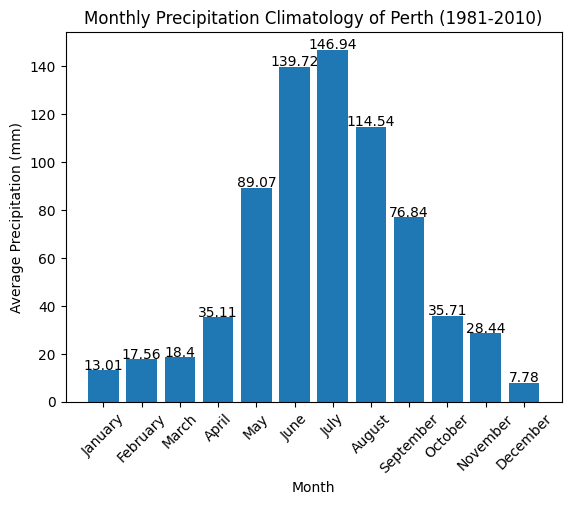

In [2]:
perth_df = pd.read_csv(os.path.join(path,
                                    'indiv1_perth_airport.csv'), engine='python')

perth_df['DATE'] = pd.to_datetime(perth_df['DATE'])
perth_df.set_index('DATE', inplace=True)

# Filter data from 1981 to 2010
filtered_df = perth_df.loc['1981':'2010']
# Calculate the average precipitation for each month
monthly_climatology = filtered_df.groupby(filtered_df.index.month)['PRCP'].mean()
# Print the average precipitation for each month
for month, avg_precipitation in monthly_climatology.items():
    print(f"Month: {month}, Average Precipitation: {avg_precipitation}")
# Find the rainiest month
rainiest_month = monthly_climatology.idxmax()
print(f"The rainiest month on average across 1981 to 2019 is month number {rainiest_month}")

# Create a figure and a set of subplots
fig, ax = plt.subplots()
# Plot the average precipitation for each month
ax.bar(monthly_climatology.index, monthly_climatology.values)
# Setting x and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Average Precipitation (mm)')

ax.set_title('Monthly Precipitation Climatology of Perth (1981-2010)')

# List of month names for x-tick labels
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months, rotation=45)

# Showing values of y-axis by annotating each data point with its 
# corresponding value
for i, v in enumerate(monthly_climatology.values):
    ax.text(i+1, v + 0.5, str(round(v, 2)), ha='center')

plt.show()

### Q2. b)

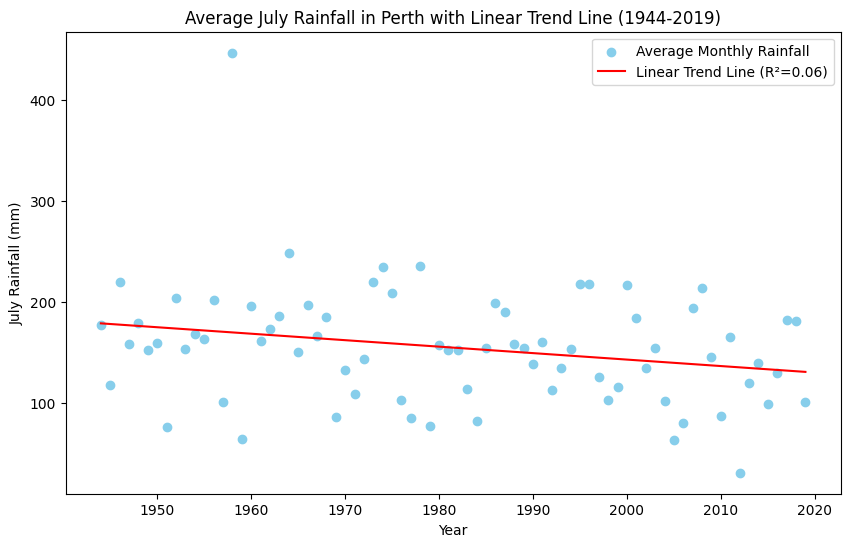

Two-Sample T-Test Results:
T-statistic: 1.3581011168763193
P-value: 0.17485819704852887
Difference between the two periods is not statistically significant (fail to reject H0).


In [3]:
# Filter data from 1944 onwards
filtered_df = perth_df.loc['1944':]

def plot_rainfall_trend(df, month, y_label, title):
    # Ensure month is a list-like object
    if not isinstance(month, (list, tuple)):
        month = [month]

    # Filter data for the specified month
    if len(month) == 1:
        monthly_rainfall = df[df.index.month == month[0]]['PRCP'].resample('Y').mean().reset_index()
    else:
        monthly_rainfall = df[df.index.month.isin(month)]['PRCP'].resample('Y').mean().reset_index()
    
    # Create a figure and set the size
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for average monthly rainfall
    plt.scatter(x=monthly_rainfall['DATE'].dt.year, y=monthly_rainfall['PRCP'], color='skyblue', label='Average Monthly Rainfall')
    
    # Fit a linear trend line
    X = monthly_rainfall['DATE'].dt.year.values.reshape(-1, 1)
    y = monthly_rainfall['PRCP'].values
    model = LinearRegression().fit(X, y)
    trend_line = model.predict(X)
   
    # Calculate R-squared value
    r_squared = r2_score(y, trend_line)

    # Plot the linear trend line
    plt.plot(monthly_rainfall['DATE'].dt.year, trend_line, color='red', label=f'Linear Trend Line (R²={r_squared:.2f})')

    # Setting x and y-axis labels
    plt.xlabel('Year')
    plt.ylabel(y_label)
    
    # Set the title and show legend
    plt.title(title)
    plt.legend()
    
    # Show the plot
    plt.show()

plot_rainfall_trend(filtered_df, 7, 'July Rainfall (mm)', 'Average July Rainfall in Perth with Linear Trend Line (1944-2019)')

# Performing statistical test using two-sample t-test
earlier_period = perth_df.loc['1951-01-01':'1980-12-31']['PRCP']
later_period = perth_df.loc['1981-01-01':'2010-12-31']['PRCP']

t_statistic, p_value = ttest_ind(earlier_period, later_period)

print(f'Two-Sample T-Test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check significance at a 95% confidence interval
alpha = 0.05
if p_value < alpha:
    print(f'Difference between the two periods is statistically significant (reject H0).')
else:
    print(f'Difference between the two periods is not statistically significant (fail to reject H0).')


### Q2. c)

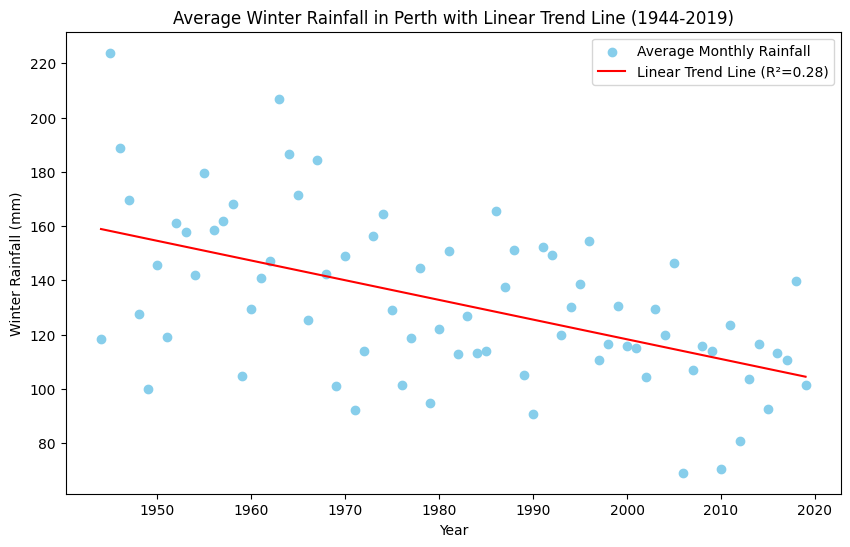

Two-Sample T-Test Results for Average Winter Rainfall Trend:
T-statistic: 2.905853284992847
P-value: 0.005177858501204699
Difference in average winter rainfall trend is statistically significant (reject H0).


In [4]:
plot_rainfall_trend(filtered_df, [5, 6, 7, 8], 'Winter Rainfall (mm)', 'Average Winter Rainfall in Perth with Linear Trend Line (1944-2019)')

# Filter data for winter months (May-August)
winter_rainfall = perth_df[perth_df.index.month.isin(range(5, 9))]['PRCP'].resample('Y').mean().reset_index()

# Performing statistical test using two-sample t-test for average winter rainfall trend
early_period = winter_rainfall[(winter_rainfall['DATE'].dt.year >= 1951) & (winter_rainfall['DATE'].dt.year <= 1980)]['PRCP']
later_period = winter_rainfall[(winter_rainfall['DATE'].dt.year >= 1981) & (winter_rainfall['DATE'].dt.year <= 2010)]['PRCP']

t_statistic, p_value = ttest_ind(early_period, later_period)

print(f'Two-Sample T-Test Results for Average Winter Rainfall Trend:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check significance at a 95% confidence interval
alpha = 0.05
if p_value < alpha:
    print(f'Difference in average winter rainfall trend is statistically significant (reject H0).')
else:
    print(f'Difference in average winter rainfall trend is not statistically significant (fail to reject H0).')


# Q3. (US Counties data)


In [5]:
county_income = pd.read_csv(os.path.join(path, 'indiv1_us_counties_incomes.csv'), engine='python')
county_temp = pd.read_csv(os.path.join(path, 'indiv1_us_counties_temperature.csv'), engine='python')

display(county_income.shape)
display(county_income.head(10))

display(county_temp.shape)
display(county_temp.head(10))

(3112, 2)

,fips,income_per_capita_2018
0,1001,41618
1,1003,45596
2,1005,35199
3,1007,30254
4,1009,34976
5,1011,28797
6,1013,36450
7,1015,37120
8,1017,33859
9,1019,35505


(3112, 9)

,fips,county,state,lat,lon,normal_1981_2010,rcp85_2020_2039,rcp85_2040_2059,rcp85_2080_2099
0,1001,Autauga County,AL,32.535000,-86.642998,18.361113,19.527779,20.516666,22.622223
1,1003,Baldwin County,AL,30.736000,-87.723000,19.211113,20.288887,21.133333,23.144447
2,1005,Barbour County,AL,31.870001,-85.392998,17.283333,18.438890,19.394447,21.477779
3,1007,Bibb County,AL,32.999001,-87.125999,16.433334,17.633335,18.666666,20.805553
4,1009,Blount County,AL,33.980999,-86.567001,15.961111,17.166668,18.255556,20.455555
5,1011,Bullock County,AL,32.099998,-85.716003,17.283333,18.438890,19.394447,21.477779
6,1013,Butler County,AL,31.752001,-86.680000,17.444445,18.588888,19.544445,21.611113
7,1015,Calhoun County,AL,33.771000,-85.825996,16.894444,18.083336,19.172224,21.399998
8,1017,Chambers County,AL,32.914001,-85.391998,16.505554,17.638889,18.677780,20.833334
9,1019,Cherokee County,AL,34.175999,-85.603996,15.177777,16.355555,17.505554,19.811113


### Q3. a)

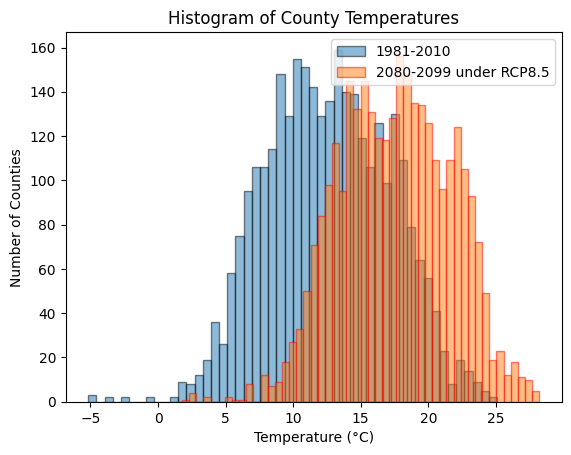

In [6]:
# Histogram based on 1981-2010 temperatures
plt.hist(county_temp['normal_1981_2010'], bins=50, alpha=0.5, label='1981-2010', edgecolor='black')

# Histogram based temperature estimates for 2080-2099 under RCP8.5 emissions
plt.hist(county_temp['rcp85_2080_2099'], bins=50, alpha=0.5, label='2080-2099 under RCP8.5', edgecolor='red')

plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Counties')
plt.title('Histogram of County Temperatures')
plt.legend(loc='upper right')
plt.show()

### Q3 b)

In [7]:
# Creating a merged dataset from the temperature and income datasets 
county_merge = pd.merge(county_income, county_temp, on='fips')

# Calculating income deciles
county_merge['Income Decile'] = pd.qcut(county_merge['income_per_capita_2018'], 10, labels=False)

# Calculating average temperatures for each time period for these income deciles
average_temps = county_merge.groupby('Income Decile').agg({
    'normal_1981_2010': 'mean',
    'rcp85_2020_2039': 'mean',
    'rcp85_2040_2059': 'mean',
    'rcp85_2080_2099': 'mean'
})
average_temps = average_temps.round(3)
display(average_temps)

,normal_1981_2010,rcp85_2020_2039,rcp85_2040_2059,rcp85_2080_2099
Income Decile,,,,
0,15.358,16.634,17.692,20.046
1,14.776,16.072,17.147,19.539
2,14.035,15.345,16.438,18.872
3,13.124,14.474,15.595,18.083
4,12.707,14.067,15.180,17.686
5,11.979,13.351,14.497,17.057
6,11.395,12.767,13.908,16.481
7,10.902,12.292,13.458,16.086
8,10.237,11.644,12.826,15.490


### Q3. c)

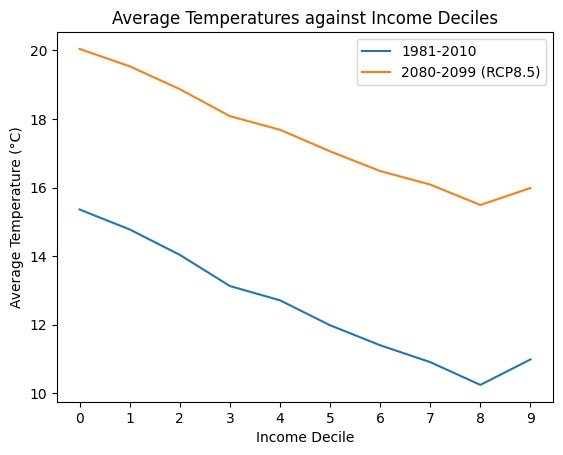

In [8]:
plt.figure()

# Plot average temperatures for both time periods
plt.plot(average_temps.index, average_temps['normal_1981_2010'], label='1981-2010')
plt.plot(average_temps.index, average_temps['rcp85_2080_2099'], label='2080-2099 (RCP8.5)')

plt.xlabel('Income Decile')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperatures against Income Deciles')
plt.xticks(range(0, 10))
plt.legend()
plt.show()

### Q3. e)

In [16]:
# Calculating change in temperature
county_merge['temp_change'] = county_merge['rcp85_2080_2099'] - county_merge['normal_1981_2010']

# Calculating average temperature change for each income decile
average_temp_change = county_merge.groupby('Income Decile')['temp_change'].mean()

# Finding income decile with the most change
highest_change = average_temp_change.idxmax()
display(f"The income decile that will experience the most change is: {highest_change}")

'The income decile that will experience the most change is: 8'

In [47]:
# Analysis of spatial pattern changes

spatial_df = pd.DataFrame({
    'lat': county_merge['lat'],
    'lon': county_merge['lon'],
    'temp_change': county_merge['temp_change'],
    'Income Decile': county_merge['Income Decile']
})

# Create a scatter plot on a map
fig = px.scatter_geo(spatial_df, lat='lat', lon='lon', color='temp_change',
                     projection='natural earth', 
                     title='Spatial pattern of temperature changes (RCP8.5)',
                     color_continuous_scale=px.colors.sequential.YlOrRd)
fig.update_geos(resolution=110, showcoastlines=True, coastlinecolor="Black",
                showocean=True, oceancolor="lightblue")
fig.update_layout(coloraxis_colorbar=dict(title="Temperature Change (°C)"))
fig.show()

fig = px.scatter_geo(spatial_df, lat='lat', lon='lon', color='Income Decile',
                     projection='natural earth', 
                     title='Spatial pattern of income deciles')
fig.update_geos(resolution=110, showcoastlines=True, coastlinecolor="Black",
                showocean=True, oceancolor="lightblue")
fig.show()

In [53]:
filtered_df = spatial_df[spatial_df['Income Decile'] == 8]
display(filtered_df.describe())
display(spatial_df.describe())

,lat,lon,temp_change,Income Decile
count,311.000000,311.000000,311.000000,311.0
mean,41.422765,-94.289058,5.252269,8.0
std,5.196372,15.202604,0.623615,0.0
min,26.576000,-170.279010,3.255556,8.0
25%,38.767499,-99.708000,4.919444,8.0
50%,41.771999,-95.309998,5.322222,8.0
75%,44.309000,-84.686500,5.666666,8.0
max,65.017998,-68.345001,7.722222,8.0


,lat,lon,temp_change,Income Decile
count,3112.000000,3112.000000,3112.000000,3112.000000
mean,38.470611,-92.389624,4.983169,4.500000
std,5.328819,12.876852,0.594605,2.874085
min,19.598000,-170.279010,2.877775,0.000000
25%,34.659499,-98.347500,4.677780,2.000000
50%,38.417999,-90.495498,5.072222,4.500000
75%,41.852001,-83.602497,5.361110,7.000000
max,69.306000,-67.638000,7.722222,9.000000


In [54]:

fig = px.scatter_geo(filtered_df, lat='lat', lon='lon', color='temp_change',
                     projection='natural earth', 
                     title='Spatial pattern of temperature changes for decile 8 counties (RCP8.5)',
                     color_continuous_scale=px.colors.sequential.YlOrRd)

fig.update_geos(resolution=110, showcoastlines=True, coastlinecolor="Black",
                showocean=True, oceancolor="lightblue")
fig.update_layout(coloraxis_colorbar=dict(title="Temperature Change"))

fig.show()


### Q3. f)